In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/loan_data_2007_2014.csv', index_col=0)
df.info()
# terdapat banyak kolom kosong maka dengan begitu kolom yang tidak ada informasi akan dihapus

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [ ]:
# list index kolom yang dihapus
index_kolom = [0,1,8,9,10,12,17,18,19,20,21,22,23,35,51,52,53,54,55,59,60,61,62,63,64,65,66,67,68,69,71,72,73]

# menghapus kolom
df.drop(df.columns[index_kolom], axis= 1, inplace= True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   emp_length                   445277 non-null  object 
 7   annual_inc                   466281 non-null  float64
 8   verification_status          466285 non-null  object 
 9   issue_d                      466285 non-null  object 
 10  loan_status                  466285 non-null  object 
 11  dti                          466285 non-null  float64
 12  delinq_2yrs                  466256 non-null  float64
 13 

In [ ]:
# mengubah kolom term
df['term'] = df['term'].str.replace('months','')
df['term'] = df['term'].astype(int)
print('Type Data = ',df['term'].dtypes)
print('--'*10)
print('Jumlah data kosong = ',df.term.isnull().sum())

Type Data =  int64
--------------------
Jumlah data kosong =  0


In [ ]:
# mengubah kolom emp_length
df['emp_length'] = df['emp_length'].str.replace('\+ years','')
df['emp_length'] = df['emp_length'].str.replace('< 1 year',str(0))
df['emp_length'] = df['emp_length'].str.replace(' years','')
df['emp_length'] = df['emp_length'].str.replace(' year','')

# cross cek
print('Jumlah value kosong =',df['emp_length'].isnull().sum())
# dikarenakan kolom emp_lenght memiliki arti lama bekerja seorang karyawan, maka untuk mengisi nilai kosong saya beri nilai 0
# menganggap bahwa karyawan tersebut memiliki durasi kurang dari 1 tahun atau baru berkerja

Jumlah value kosong = 21008


In [ ]:
df['emp_length'] = df['emp_length'].fillna(0)

# merubah type data dari kolom tersebut
df['emp_length'] = df['emp_length'].astype(int)

In [ ]:
# mempertajam kategori pada kolom loan_status
df['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [ ]:
map_loan = {'Fully Paid' : 'Fully Paid',
            'Does not meet the credit policy. Status:Fully Paid': 'Fully Paid',
            'Current' : 'Current',
            'In Grace Period' : 'Current',
            'Default' : 'Default' ,
            'Charged Off' : 'Default',
            'Late (16-30 days)' : 'Default',
            'Late (31-120 days)' : 'Default',
            'Does not meet the credit policy. Status:Charged Off': 'Default'
            }

df['loan_status'] = df['loan_status'].replace(map_loan)
print('Cross Cek\n',df['loan_status'].value_counts())
df.rename(columns={'loan_status': 'Label'},inplace=True)

Cross Cek
 Current       227372
Fully Paid    186727
Default        52186
Name: loan_status, dtype: int64


## Data berkategori Tanggal

In [ ]:
df[['issue_d','earliest_cr_line','last_pymnt_d']].head(3)

,issue_d,earliest_cr_line,last_pymnt_d
0,Dec-11,Jan-85,Jan-15
1,Dec-11,Apr-99,Apr-13
2,Dec-11,Nov-01,Jun-14


In [ ]:
# mengubah type data agar lebih sesuai
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')
df['next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'], format='%b-%y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')

In [ ]:
# cross cek
df[['issue_d','earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d']].isnull().sum()

issue_d                    0
earliest_cr_line          29
last_pymnt_d             376
next_pymnt_d          227214
last_credit_pull_d        42
dtype: int64

In [ ]:
# kolom next_pymnt_d dihapus karena data hilang hampir 50%
df = df.drop(columns= 'next_pymnt_d', axis=1)

# untuk missing value pada kolom 'earliest_cr_line','last_pymnt_d','last_credit_pull_d'
# dikarenakan nilai kosong tidak banyak maka saya memutuskan untuk menghapus
df = df.dropna(subset=['earliest_cr_line','last_pymnt_d','last_credit_pull_d'])

In [ ]:
data_tanggal = df[['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']]
data_tanggal.head()

# untuk kolom tanggal akan dilakukan pemisahan mendrop kolom dari data awal (df) untuk analisa lebih lanjut
# lebih ke visualisasi dan forecasting

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
0,2011-12-01,1985-01-01,2015-01-01,2016-01-01
1,2011-12-01,1999-04-01,2013-04-01,2013-09-01
2,2011-12-01,2001-11-01,2014-06-01,2016-01-01
3,2011-12-01,1996-02-01,2015-01-01,2015-01-01
4,2011-12-01,1996-01-01,2016-01-01,2016-01-01


In [ ]:
 # melakukan drop kolom tanggal
 df = df.drop(columns=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d'], axis= 1)

In [ ]:
# cross cek missing value
df.isnull().sum()

# terdapat beberapa kolom yang memiliki jumlah missing value besar hal ini tidak baik
# dikarenakan dapat mempengaruhi informasi yang ada jika dilakukan imputasi data
# maka saya akan melakukan drop dan dropna pada kolom yang memiliki missing value.

loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
emp_length                          0
annual_inc                          0
verification_status                 0
Label                               0
dti                                 0
delinq_2yrs                         0
inq_last_6mths                      0
mths_since_last_delinq         250082
mths_since_last_record         403255
open_acc                            0
pub_rec                             0
revol_bal                           0
revol_util                        305
total_acc                           0
out_prncp                           0
out_prncp_inv                       0
total_pymnt                         0
total_pymnt_inv                     0
total_rec_prncp                     0
total_rec_int                       0
total_rec_la

In [ ]:
list_kolom = [13,14,31]
df.drop(df.columns[list_kolom],axis=1, inplace=True)
# menghapis nilai kosong
df= df.dropna(subset=['revol_util','collections_12_mths_ex_med','tot_coll_amt','tot_cur_bal','total_rev_hi_lim'])

In [ ]:
#menampilkan kolom yang bertype object dan datetime
print('Kolom bertype Object',df.select_dtypes('object').columns)
print('======'*20)
print('Kolom bertype Int',df.select_dtypes('int64','int32').columns)
print('======'*20)
print('Kolom bertype Float',df.select_dtypes('float64').columns)

Kolom bertype Object Index(['verification_status', 'Label'], dtype='object')
Kolom bertype Int Index(['loan_amnt', 'funded_amnt', 'term', 'emp_length', 'revol_bal'], dtype='object')
Kolom bertype Float Index(['funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')


In [ ]:
df.describe().T
# rentang nilai antara min dan max sangat jauh hal ini dapat memicu terjadinya bias

,count,mean,std,min,25%,50%,75%,max
loan_amnt,395492.0,14742.490493,8303.902096,1000.00,8325.000000,13000.000,20000.0000,3.500000e+04
funded_amnt,395492.0,14742.452060,8303.857373,1000.00,8325.000000,13000.000,20000.0000,3.500000e+04
funded_amnt_inv,395492.0,14735.935648,8300.563361,950.00,8325.000000,13000.000,20000.0000,3.500000e+04
term,395492.0,42.796537,10.813153,36.00,36.000000,36.000,60.0000,6.000000e+01
int_rate,395492.0,14.048718,4.377380,6.00,10.990000,13.980,16.9900,2.606000e+01
installment,395492.0,445.294798,243.722029,23.26,269.520000,392.735,581.7700,1.409990e+03
emp_length,395492.0,5.844290,3.765369,0.00,2.000000,6.000,10.0000,1.000000e+01
annual_inc,395492.0,74049.775392,54615.504898,3000.00,45000.000000,64000.000,90000.0000,7.500000e+06
dti,395492.0,17.731501,7.876435,0.00,11.800000,17.340,23.4000,3.999000e+01
delinq_2yrs,395492.0,0.308014,0.833993,0.00,0.000000,0.000,0.0000,2.900000e+01


In [ ]:
# untuk menghindari dimensi kutukan saya aak menyaring kembali beberapa fitur
# dengan cara mendrop fitur yang memiliki nilai mean 0, dengan alasan jika nilai mean = 0
# maka dapat diartikan bahwa nilia 0 lebih dominan dalam fitur
df = df.drop(columns=['delinq_2yrs','inq_last_6mths','pub_rec','total_rec_late_fee','collections_12_mths_ex_med','acc_now_delinq'], axis=1)

## Feature Enggineering

In [ ]:
# mencadangkan data
data = df.copy()

In [ ]:
data['Label'].value_counts()

Current       223593
Fully Paid    130952
Default        40947
Name: Label, dtype: int64

In [ ]:
data['verification_status'].value_counts()

Verified           144307
Source Verified    131971
Not Verified       119214
Name: verification_status, dtype: int64

In [ ]:
# melakukan pelabelan
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data['verification_status'] = label.fit_transform(data['verification_status'])
data['Label'] = label.fit_transform(data['Label'])

In [ ]:
data['Label'].value_counts()
# label 0 = Current
# label 1 = Default
# label 2 = Fully Paid

0    223593
2    130952
1     40947
Name: Label, dtype: int64

In [ ]:
data['verification_status'].value_counts()
# 0 = Not Verified
# 1 = Source Verified
# 2 = Verified

2    144307
1    131971
0    119214
Name: verification_status, dtype: int64

## Cross Cek Class Imbalance

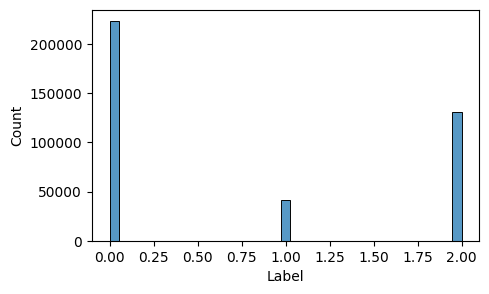

In [ ]:
plt.figure(figsize=(5,3))
sns.histplot(data['Label'])
plt.show()
# dari visualisasi nampak bahwa data yang dimiliki tidak seimbang, sehingga perlu dilakukan handle class imbalance
# untuk menghindari model lebih berfokus terhadak kelas mayoritas
# dan hasil model akan tidak akurat

In [ ]:
from imblearn.over_sampling import SMOTE

df_indep = data.drop('Label', axis = 1)
df_depen = data['Label']

smote = SMOTE(random_state=42)
df_indep_resampled, df_depen_resampled = smote.fit_resample(df_indep, df_depen)


In [ ]:
# mengabungkan data_scale dengan label
df_smote = pd.concat([df_indep_resampled, df_depen_resampled],axis=1)
df_smote.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,verification_status,dti,open_acc,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,Label
0,27050,27050,27050.0,36,10.99,885.46,10,55000.0,2,22.87,14.0,36638,61.2,27.0,10018.90,10018.90,21251.04,21251.04,17031.10,4219.94,0.0,0.0,885.46,0.0,114834.0,59900.0,0
1,9750,9750,9750.0,36,13.98,333.14,1,26000.0,0,25.12,12.0,7967,52.8,28.0,3710.96,3710.96,7994.83,7994.83,6039.04,1955.79,0.0,0.0,333.14,0.0,14123.0,15100.0,0
2,12000,12000,12000.0,36,6.62,368.45,10,105000.0,0,14.05,12.0,13168,21.6,22.0,4266.62,4266.62,8842.80,8842.80,7733.38,1109.42,0.0,0.0,368.45,0.0,267646.0,61100.0,0
3,12000,12000,12000.0,36,13.53,407.40,10,40000.0,1,16.94,7.0,5572,68.8,32.0,0.00,0.00,13359.77,13359.77,11999.99,1359.78,0.0,0.0,119.17,15386.0,13605.0,8100.0,2
4,15000,15000,15000.0,36,8.90,476.30,2,63000.0,0,16.51,8.0,11431,74.2,29.0,5449.27,5449.27,11431.20,11431.20,9550.73,1880.47,0.0,0.0,476.30,1514.0,272492.0,15400.0,0


In [ ]:
df_smote['Label'].value_counts()

0    223593
2    223593
1    223593
Name: Label, dtype: int64

In [ ]:
# melakukan standarisasi untuk menghindari bias
from sklearn.preprocessing import StandardScaler

numerik = df_smote.drop(columns= ['verification_status','Label'], axis=1)
kategorikal = df_smote[['verification_status','Label']]

Scaler = StandardScaler ()
data_scale = pd.DataFrame(Scaler.fit_transform(numerik),columns=numerik.columns,index=numerik.index)
data_scale.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1.499274,1.499306,1.500706,-0.663246,-0.864017,1.813812,1.240287,-0.333586,0.646969,0.542651,1.074512,0.161290,0.142709,1.060581,1.061097,1.304672,1.306023,1.276070,0.765552,-0.315136,-0.233368,-0.408992,-0.011832,-0.125028,0.943238
1,-0.603168,-0.603168,-0.602625,-0.663246,-0.154648,-0.474523,-1.302666,-0.902709,0.945819,0.119490,-0.424942,-0.221720,0.233883,0.018160,0.018366,-0.340626,-0.340145,-0.278323,-0.228226,-0.315136,-0.233368,-0.506581,-0.011832,-0.811099,-0.428943
2,-0.329729,-0.329725,-0.329070,-0.663246,-1.900786,-0.328229,1.240287,0.647661,-0.524521,0.119490,-0.152937,-1.644329,-0.313164,0.109986,0.110219,-0.235380,-0.234843,-0.038726,-0.599713,-0.315136,-0.233368,-0.500342,-0.011832,0.915970,0.979993
3,-0.329729,-0.329725,-0.329070,-0.663246,-0.261410,-0.166854,1.240287,-0.627960,-0.140665,-0.938412,-0.550197,0.507823,0.598581,-0.595096,-0.595072,0.325245,0.326078,0.564618,-0.489825,-0.315136,-0.233368,-0.544387,1.062931,-0.814628,-0.643346
4,0.034857,0.034866,0.035669,-0.663246,-1.359863,0.118608,-1.020116,-0.176586,-0.197779,-0.726831,-0.243779,0.754044,0.325057,0.305425,0.305716,0.085880,0.086586,0.218267,-0.261285,-0.315136,-0.233368,-0.481286,0.093926,0.948983,-0.419754


In [ ]:
# mengabungkan data_scale dengan label
df_gabung = pd.concat([data_scale, kategorikal],axis=1)
df_gabung.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,verification_status,Label
0,1.499274,1.499306,1.500706,-0.663246,-0.864017,1.813812,1.240287,-0.333586,0.646969,0.542651,1.074512,0.161290,0.142709,1.060581,1.061097,1.304672,1.306023,1.276070,0.765552,-0.315136,-0.233368,-0.408992,-0.011832,-0.125028,0.943238,2,0
1,-0.603168,-0.603168,-0.602625,-0.663246,-0.154648,-0.474523,-1.302666,-0.902709,0.945819,0.119490,-0.424942,-0.221720,0.233883,0.018160,0.018366,-0.340626,-0.340145,-0.278323,-0.228226,-0.315136,-0.233368,-0.506581,-0.011832,-0.811099,-0.428943,0,0
2,-0.329729,-0.329725,-0.329070,-0.663246,-1.900786,-0.328229,1.240287,0.647661,-0.524521,0.119490,-0.152937,-1.644329,-0.313164,0.109986,0.110219,-0.235380,-0.234843,-0.038726,-0.599713,-0.315136,-0.233368,-0.500342,-0.011832,0.915970,0.979993,0,0
3,-0.329729,-0.329725,-0.329070,-0.663246,-0.261410,-0.166854,1.240287,-0.627960,-0.140665,-0.938412,-0.550197,0.507823,0.598581,-0.595096,-0.595072,0.325245,0.326078,0.564618,-0.489825,-0.315136,-0.233368,-0.544387,1.062931,-0.814628,-0.643346,1,2
4,0.034857,0.034866,0.035669,-0.663246,-1.359863,0.118608,-1.020116,-0.176586,-0.197779,-0.726831,-0.243779,0.754044,0.325057,0.305425,0.305716,0.085880,0.086586,0.218267,-0.261285,-0.315136,-0.233368,-0.481286,0.093926,0.948983,-0.419754,0,0


In [ ]:
df_gabung.describe().T
# setelah dilakukan standarisasi data tidak lagi menunjuka bias.
# namun bukan berarti pada data ini tidak terdapat outlier, hanya saja tersamarkan karena dilakukan standarisasi
# sehingga rentang nilai menjadi sama untuk melakukan pengecek tentang outlier sebaiknya dilakukan sebelum dilakukan standarisasi
# namun untuk data yang saat ini dimiliki saya tidak melakukan handle outloer dikarenakan data yang saya miliki merupakan data perbankan
# yang pda umumnya sangat lah wajar jika terjadi outlier.
df_gabung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670779 entries, 0 to 670778
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loan_amnt                670779 non-null  float64
 1   funded_amnt              670779 non-null  float64
 2   funded_amnt_inv          670779 non-null  float64
 3   term                     670779 non-null  float64
 4   int_rate                 670779 non-null  float64
 5   installment              670779 non-null  float64
 6   emp_length               670779 non-null  float64
 7   annual_inc               670779 non-null  float64
 8   dti                      670779 non-null  float64
 9   open_acc                 670779 non-null  float64
 10  revol_bal                670779 non-null  float64
 11  revol_util               670779 non-null  float64
 12  total_acc                670779 non-null  float64
 13  out_prncp                670779 non-null  float64
 14  out_

<Axes: >

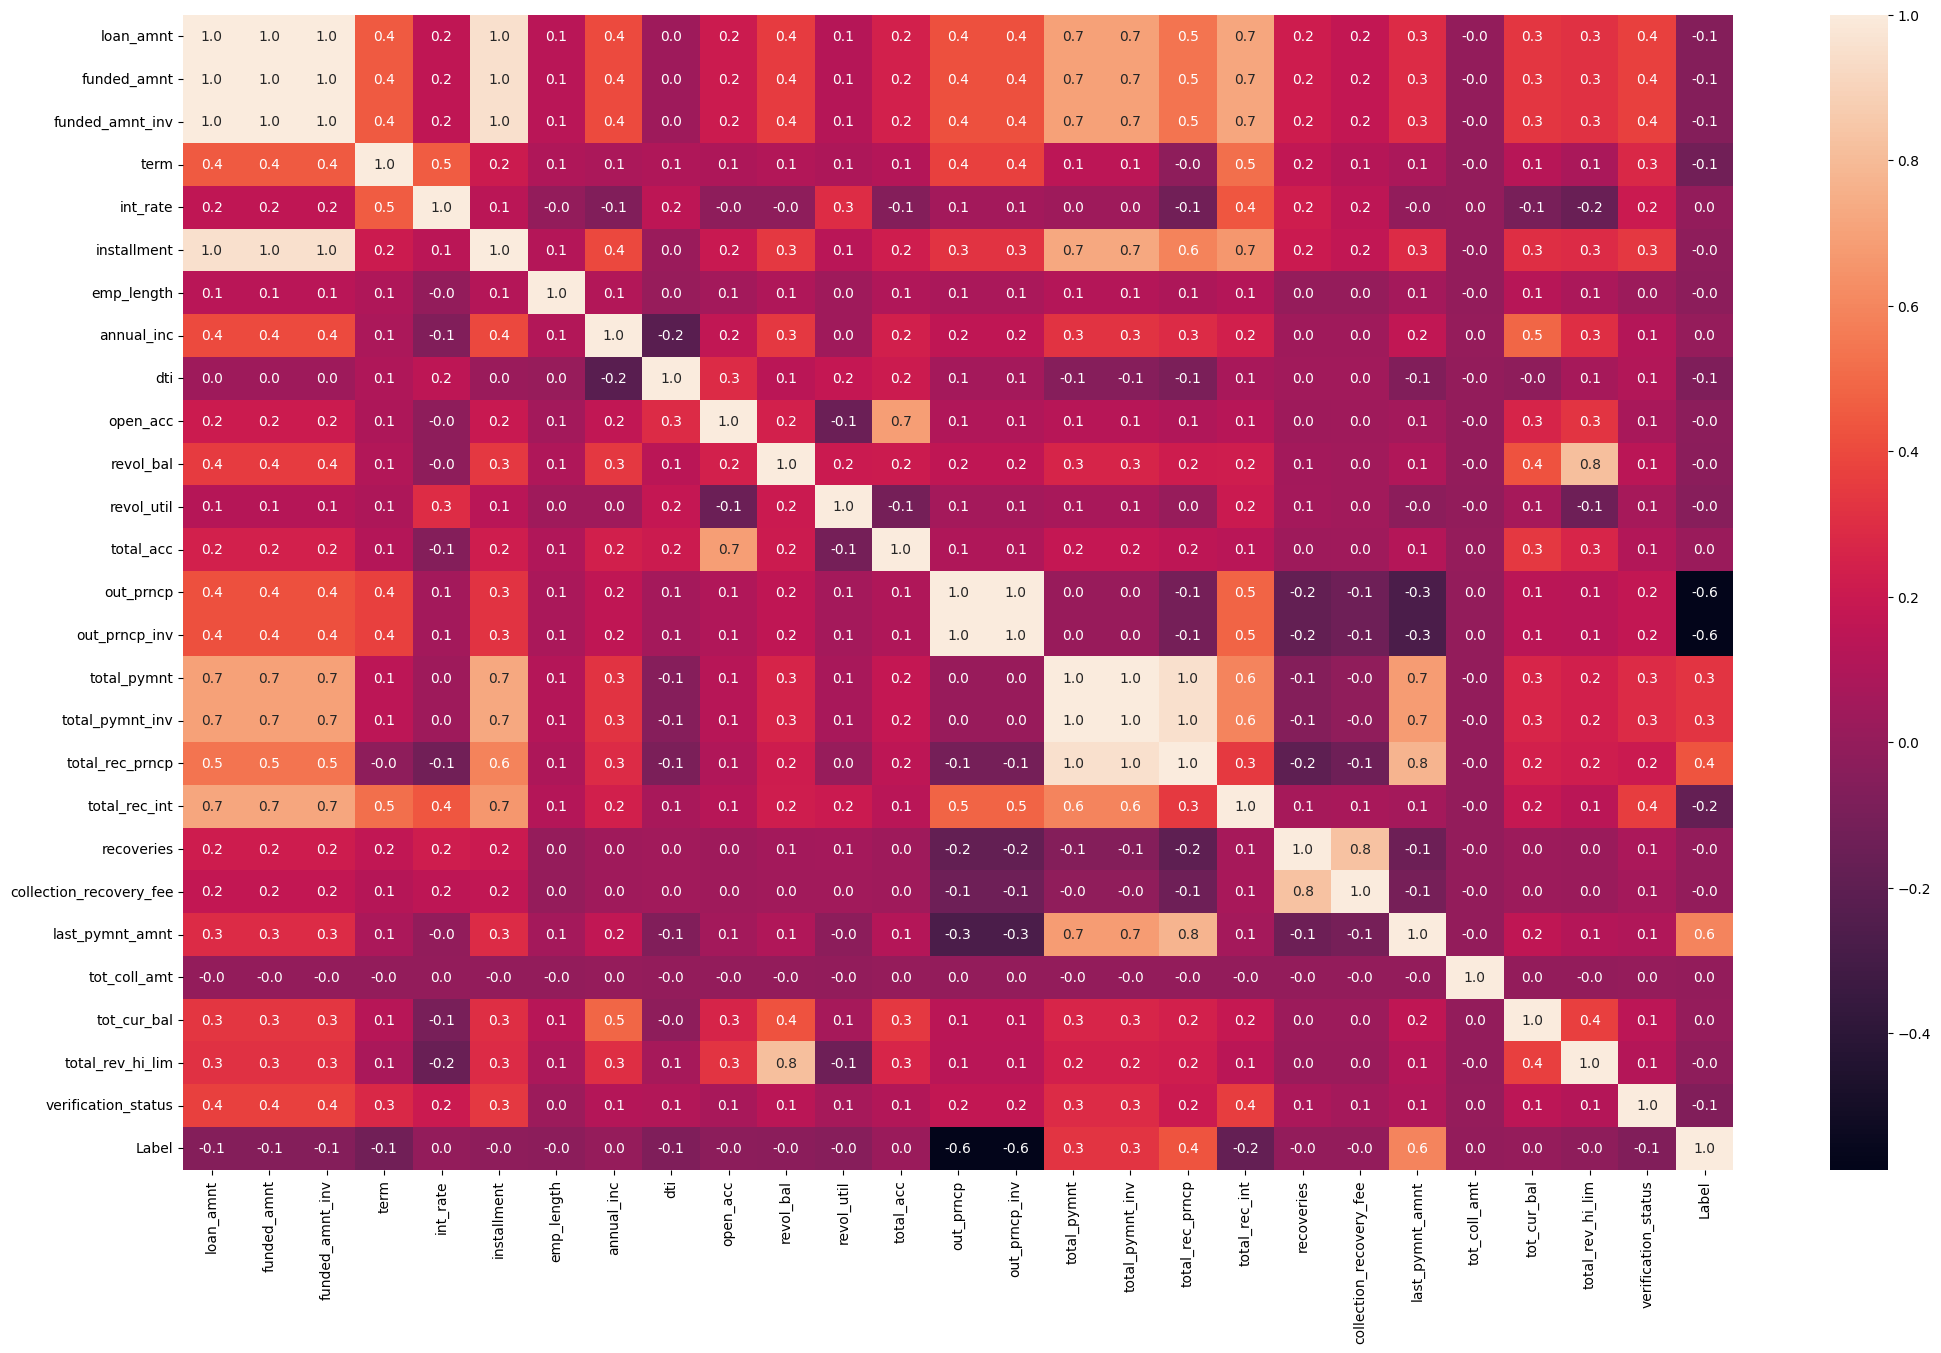

In [ ]:
# melihat korelasi menggunakan visualisasi heatmap
df_corr =df_gabung.corr()
plt.figure(figsize=(25,15))
sns.heatmap(df_corr, annot=True, fmt='.1f')

## Modeling

### Evaluasi Model with k-fold

In [77]:
from sklearn.model_selection import KFold

X = df_gabung.drop(columns=['Label'], axis=1)
y = df_gabung['Label']

# menentukan nilai k
kf = KFold(n_splits = 5, shuffle=True, random_state= 42)

# melakukan K-Fold Cross-Validation
for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [78]:
print(df_gabung.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(670779, 27)
(536624, 26)
(134155, 26)
(536624,)
(134155,)


In [79]:
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNetCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,mean_gamma_deviance

In [80]:
model1 = LogisticRegression()
model2 = LinearRegression()
model3 = ElasticNetCV(l1_ratio = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], cv=10)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

prediksi1 = model1.predict(X_test)
MAE1 = mean_absolute_error(y_test, prediksi1)
print(f'Model1: {MAE1}')

prediksi2 = model2.predict(X_test)
MAE2 = mean_absolute_error(y_test, prediksi2)
print(f'Model2: {MAE2}')

prediksi3 = model3.predict(X_test)
MAE3 = mean_absolute_error(y_test, prediksi3)
print(f'Model3: {MAE3}')

Model1: 0.06440311579888934
Model2: 0.42184815257487746
Model3: 0.42184300320531937


dari ketiga model linier, model logistik memiliki nilai MAE lebih kecil sehingga menunjukan bsemakin kecil nilai error maka semakin baik kinerja model.

In [81]:
modelXGB = XGBClassifier()
modelXGB.fit(X_train, y_train)
predikXGB = modelXGB.predict(X_test)

# Evaluasi model
confusion_mat = confusion_matrix(y_test, predikXGB)
classification_rep = classification_report(y_test,predikXGB)

# Menampilkan Hasil Output
print('Confusion Matrik')
print(confusion_mat)
print("----------------------------------------------------------------------------")
print(classification_report(y_test,predikXGB))

Confusion Matrik
[[44587    41    64]
 [ 2251 42536    52]
 [    1     3 44620]]
----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     44692
           1       1.00      0.95      0.97     44839
           2       1.00      1.00      1.00     44624

    accuracy                           0.98    134155
   macro avg       0.98      0.98      0.98    134155
weighted avg       0.98      0.98      0.98    134155

